In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pymannkendall as mk

In [4]:
df = pd.read_csv(r"C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\dados_de_entrada\SC.csv", sep=';', encoding='latin1')

df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

# Filtrar dados apenas da estação SC_002 e poluentes que vou analisar

filtred_SC_002_df = df.loc[
(df['Codigo'] == 'SC_002') &
(df['Poluente'].isin(['MP10', 'PTS', 'SO2', 'NO2']))]

filtred_SC_002_df.loc[:, 'Date'] = df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(lambda x: datetime(x['Ano'], x['Mes'], x['Dia'], x['Hora'], x['Minuto']), axis=1)

filtred_SC_002_df = filtred_SC_002_df.set_index('Date')

filtred_SC_002_df = filtred_SC_002_df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto','Poluente','Valor', 'Unidade']]
filtred_SC_002_df['Dia_da_Semana'] = filtred_SC_002_df.index.day_name(locale='pt_BR').str[:3]

filtred_SC_002_df

C:\Users\najuw\AppData\Local\Temp\ipykernel_27128\2690321489.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_SC_002_df.loc[:, 'Date'] = df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(lambda x: datetime(x['Ano'], x['Mes'], x['Dia'], x['Hora'], x['Minuto']), axis=1)


,Ano,Mes,Dia,Hora,Minuto,Poluente,Valor,Unidade,Dia_da_Semana
Date,,,,,,,,,
2023-01-01 00:30:00,2023,1,1,0,30,PTS,20.0,ug/m3,Dom
2023-01-01 01:30:00,2023,1,1,1,30,PTS,17.0,ug/m3,Dom
2023-01-01 02:30:00,2023,1,1,2,30,PTS,21.0,ug/m3,Dom
2023-01-01 03:30:00,2023,1,1,3,30,PTS,16.0,ug/m3,Dom
2023-01-01 04:30:00,2023,1,1,4,30,PTS,17.0,ug/m3,Dom
...,...,...,...,...,...,...,...,...,...
2023-12-31 19:30:00,2023,12,31,19,30,NO2,NaN,ug/m3,Dom
2023-12-31 20:30:00,2023,12,31,20,30,NO2,NaN,ug/m3,Dom
2023-12-31 21:30:00,2023,12,31,21,30,NO2,NaN,ug/m3,Dom


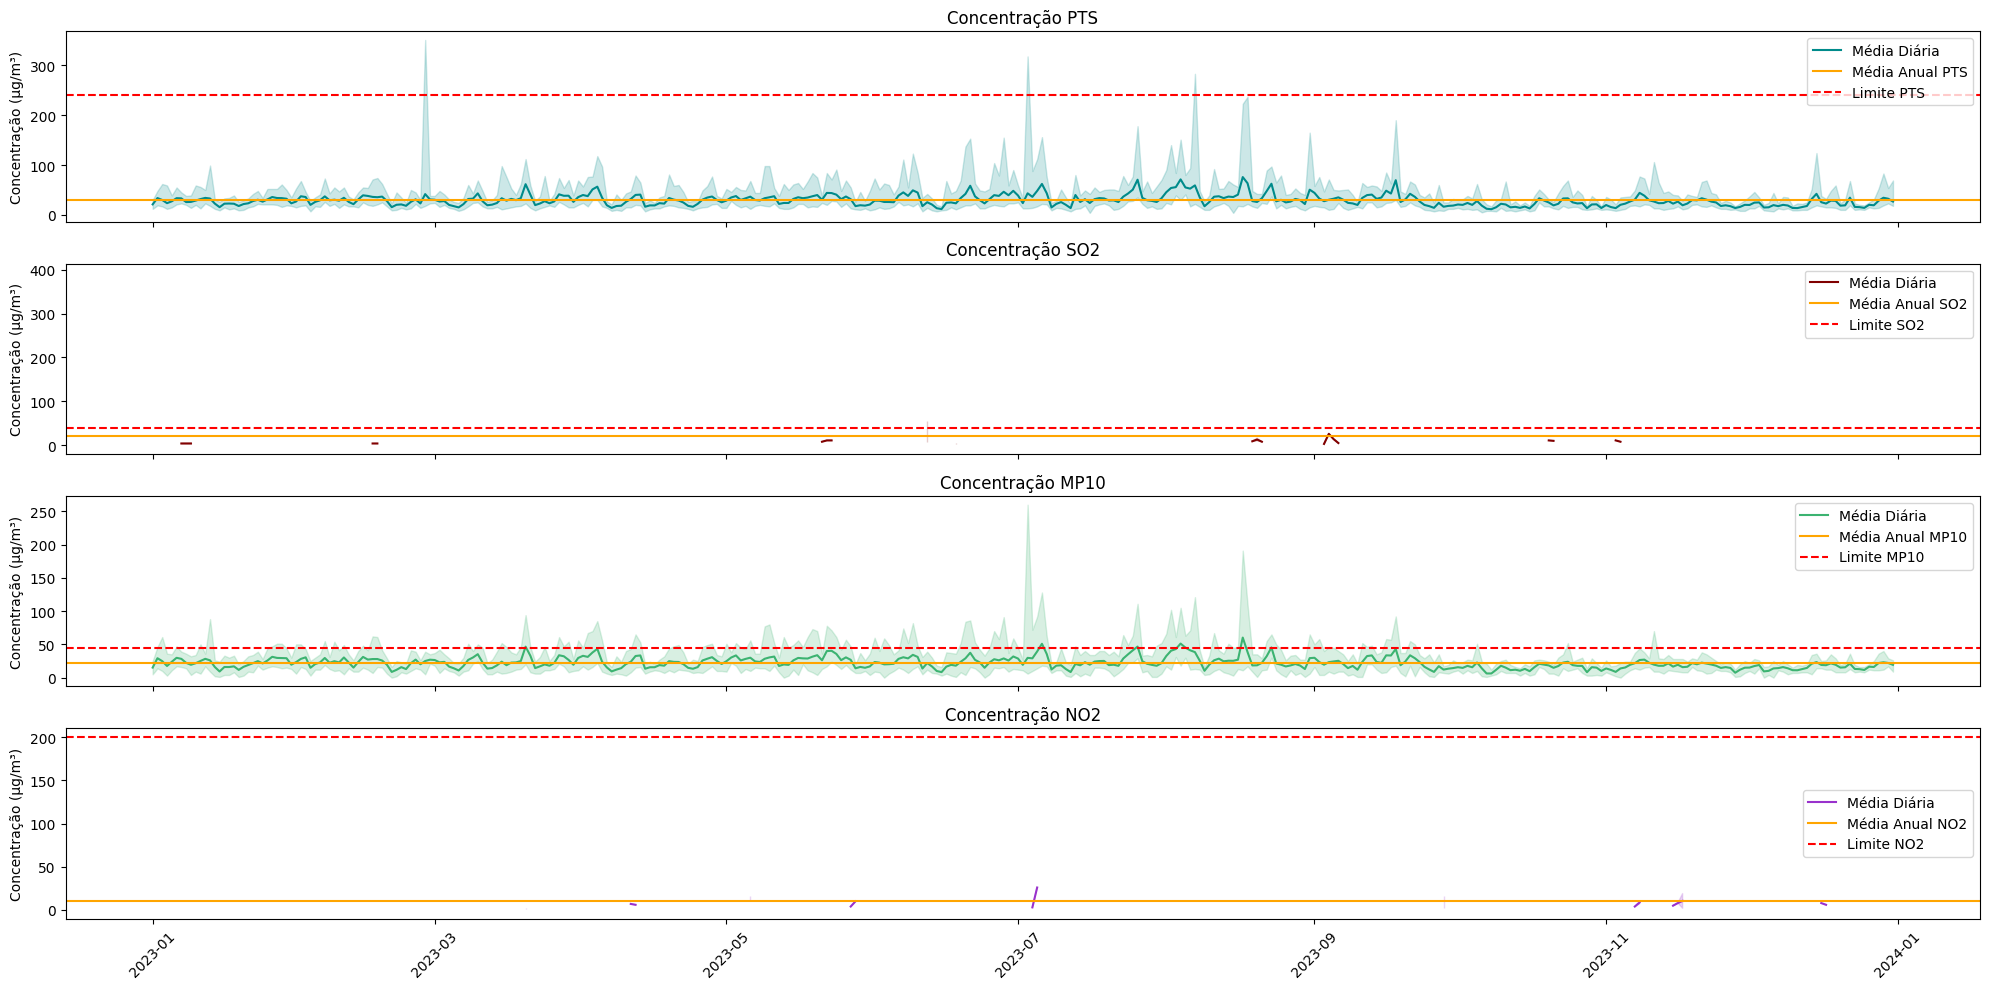

In [6]:
## Análise da série temporal utilizando um lineplot

df_PTS = filtred_SC_002_df.query('Poluente =="PTS"')
df_SO2 = filtred_SC_002_df.query('Poluente =="SO2"')
df_MP10 = filtred_SC_002_df.query('Poluente == "MP10"')
df_NO2 = filtred_SC_002_df.query('Poluente == "NO2"')

data = [
    (df_PTS, 'Concentração PTS', 'Concentração (µg/m³)', 240, 'blue'),
    (df_SO2, 'Concentração SO2', 'Concentração (µg/m³)', 40, 'red'),
    (df_MP10, 'Concentração MP10', 'Concentração (µg/m³)', 45, 'black'),
    (df_NO2, 'Concentração NO2', 'Concentração (µg/m³)', 200, 'green')
]

# Lista de poluentes

poluentes = {
    "PTS": ('#008B8B', 240, 'µg/m³'),
    "SO2": ('#800000', 40, 'µg/m³'),
    "MP10": ('#3CB371', 45, 'µg/m³'),
    "NO2": ('#9932CC', 200, 'µg/m³')
}

# Criando subplots
fig, ax = plt.subplots(len(poluentes), 1, sharex=True, figsize=(20, 10))

# Plotando os dados em loop
for i, (poluente, (color, limite, unidade)) in enumerate(poluentes.items()):
    dff = filtred_SC_002_df.query(f'Poluente == "{poluente}"')

    # Agregando dados
    media_diaria = dff['Valor'].resample('D').mean()
    min_diaria = dff['Valor'].resample('D').min()
    max_diaria = dff['Valor'].resample('D').max()
    media_anual = dff['Valor'].resample('YE').mean().iloc[-1]
    
    # Plotando a média diária
    ax[i].plot(media_diaria.index, media_diaria, color=color, label='Média Diária')
    ax[i].fill_between(media_diaria.index, min_diaria, max_diaria, color=color, alpha=0.2)
    
    # Plotando a média anual como uma linha horizontal
    ax[i].axhline(y=media_anual, color='orange', linestyle='-', label=f'Média Anual {poluente}')
    
    # Plotando limite
    ax[i].axhline(y=limite, color='red', linestyle='--', label=f'Limite {poluente}')
    
    ax[i].set_title(f'Concentração {poluente}')
    ax[i].set_ylabel(f'Concentração ({unidade})')
    ax[i].legend()

# Ajustando o eixo
ax[-1].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Salvando os gráficos como JPEG
plt.savefig(r'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\figuras\concentracoes.jpg', format='jpeg', dpi=300)


plt.show()

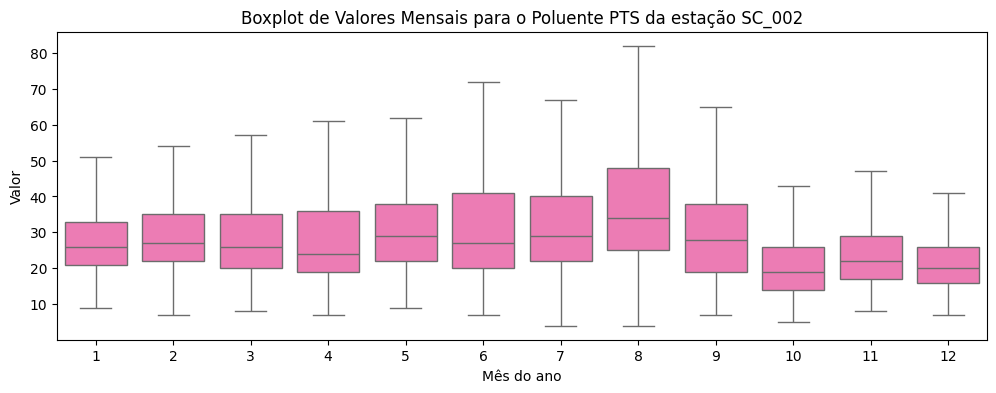

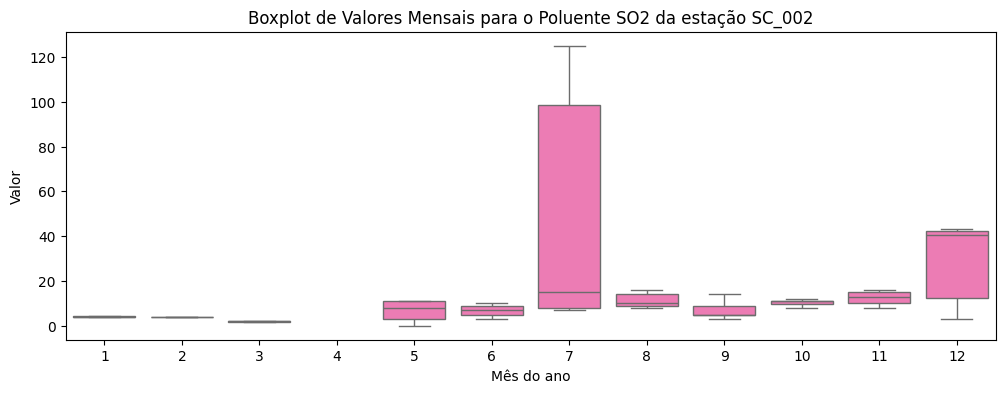

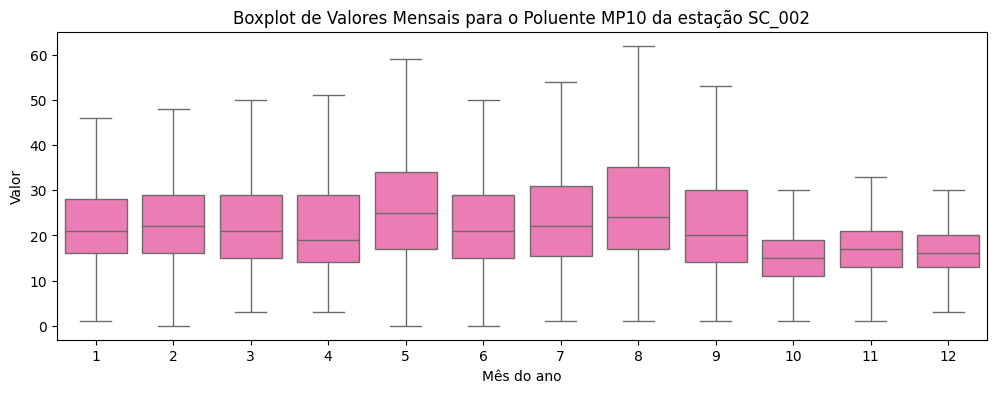

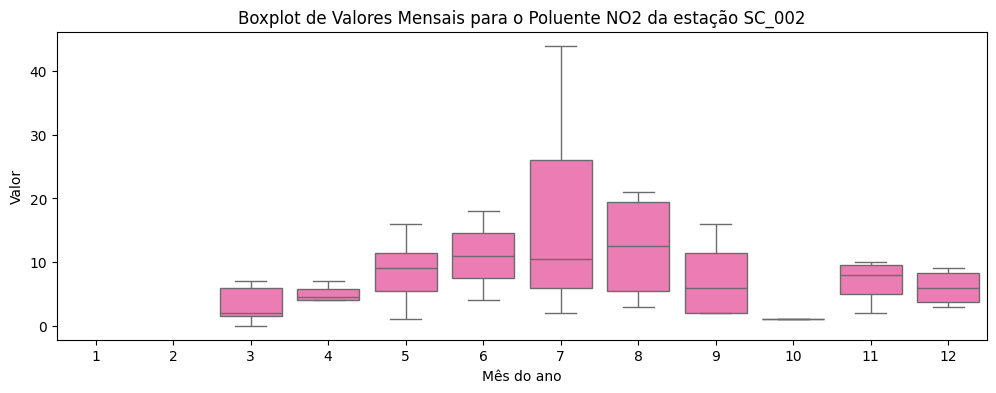

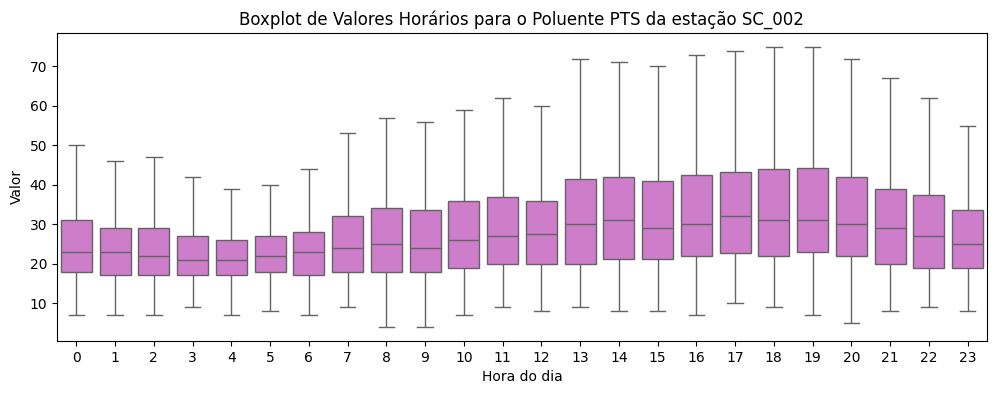

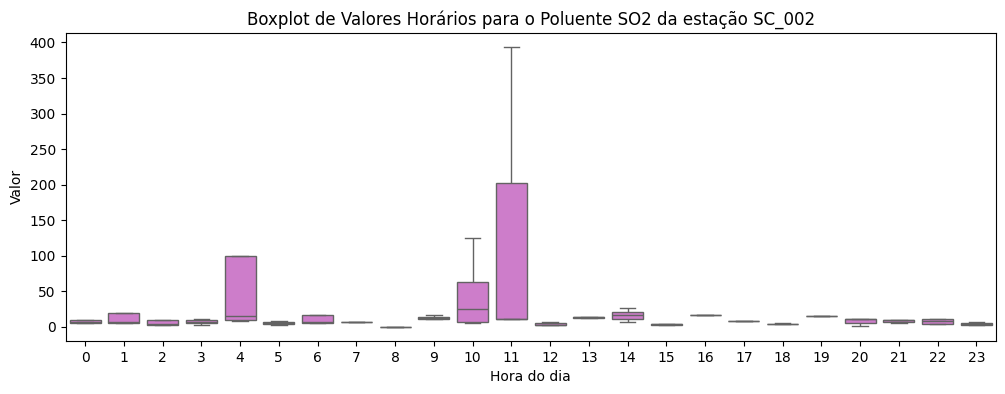

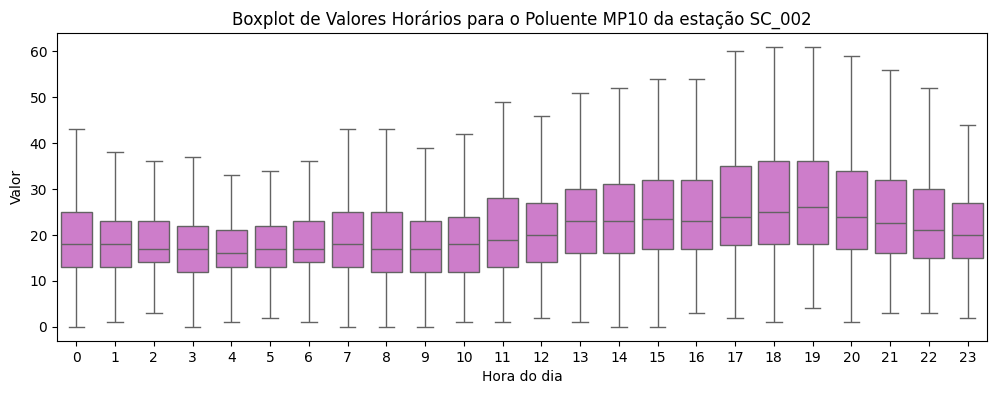

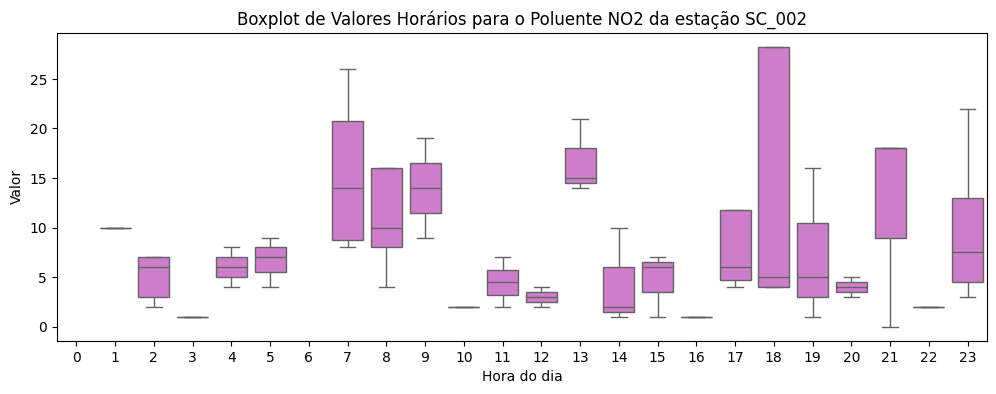

C:\Users\najuw\AppData\Local\Temp\ipykernel_27128\4071630329.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Estacao'] = data['Mes'].map(estacoes)
C:\Users\najuw\AppData\Local\Temp\ipykernel_27128\4071630329.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Estacao'] = data['Mes'].map(estacoes)
C:\Users\najuw\AppData\Local\Temp\ipykernel_27128\4071630329.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

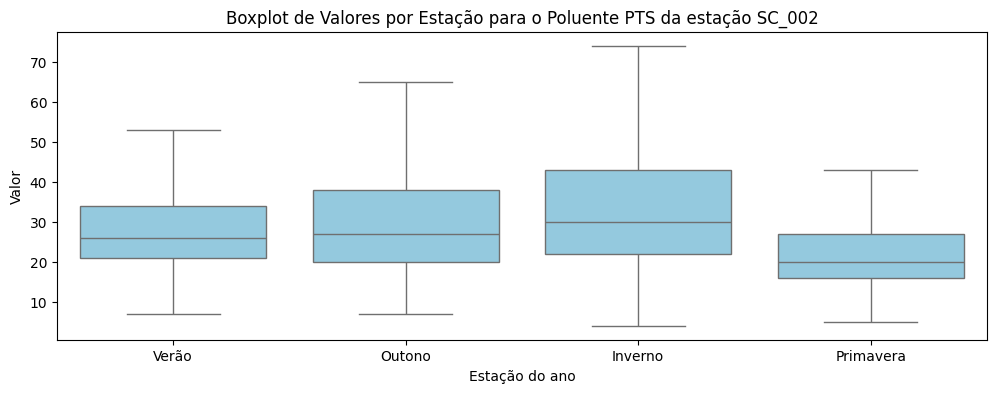

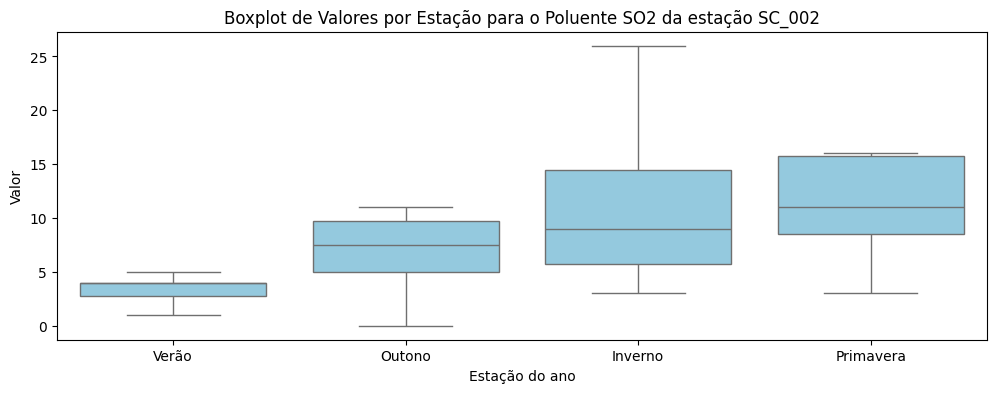

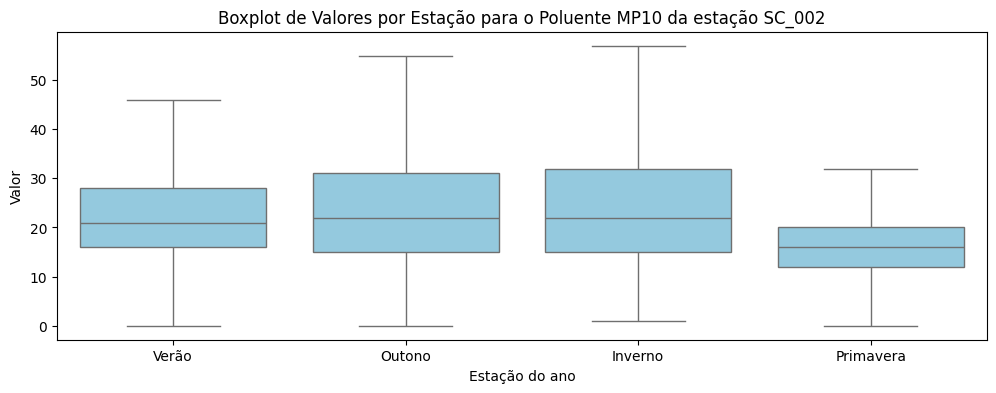

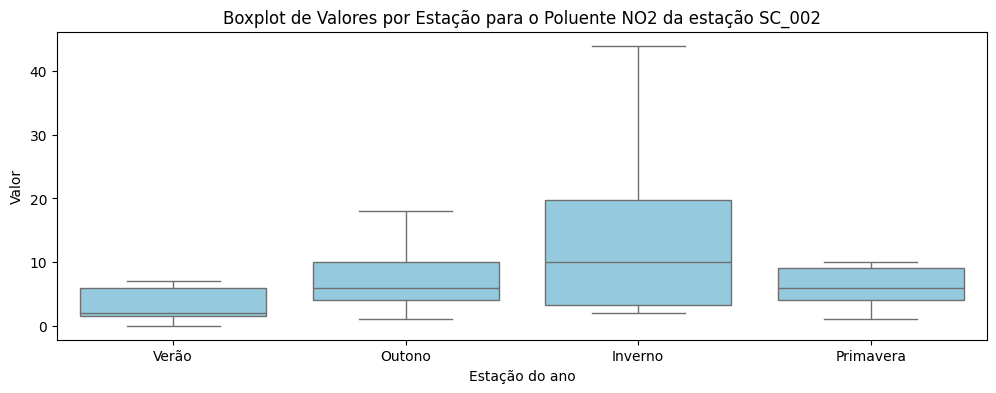

In [7]:
## Análise da série temporal através de um boxplot.

#Gerando gráfico Boxplot para valores mensais

def plot_boxplot(data, poluente):
   
    fig, ax = plt.subplots()
    fig.set_size_inches((12, 4))
    sns.boxplot(x='Mes', y='Valor', data=data, ax=ax, showfliers=False,color='#FF69B4')
    

    plt.xlabel('Mês do ano')
    plt.ylabel('Valor')
    plt.title(f'Boxplot de Valores Mensais para o Poluente {poluente} da estação SC_002')

 # Salvando o boxplot como JPEG
    plt.savefig(rf'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\figuras\boxplot_mensal_{poluente}.jpg', format='jpeg', dpi=300)
    
    plt.show()
    
# Chamando a função para cada DataFrame
plot_boxplot(df_PTS, 'PTS')
plot_boxplot(df_SO2, 'SO2')
plot_boxplot(df_MP10, 'MP10')
plot_boxplot(df_NO2, 'NO2')


# Gerando gráfico boxplot para valores de hora

def plot_boxplot(data, poluente):

    fig, ax = plt.subplots()
    fig.set_size_inches((12, 4))
    sns.boxplot(x='Hora', y='Valor', data=data, ax=ax, showfliers=False, color='#DA70D6')
    
    plt.xlabel('Hora do dia')
    plt.ylabel('Valor')
    plt.title(f'Boxplot de Valores Horários para o Poluente {poluente} da estação SC_002') 

 # Salvando o boxplot como JPEG
    plt.savefig(rf'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\figuras\boxplot_hora_{poluente}.jpg', format='jpeg', dpi=300)
    
    plt.show()


# Chamando a função para cada DataFrame
plot_boxplot(df_PTS, 'PTS')
plot_boxplot(df_SO2, 'SO2')
plot_boxplot(df_MP10, 'MP10')
plot_boxplot(df_NO2, 'NO2')

# Determinando e adicionando as estações

def adicionar_estacoes(data):
    estacoes = {
        1: 'Verão', 2: 'Verão', 3: 'Verão',
        4: 'Outono', 5: 'Outono', 6: 'Outono',
        7: 'Inverno', 8: 'Inverno', 9: 'Inverno',
        10: 'Primavera', 11: 'Primavera', 12: 'Primavera'
    }
    data['Estacao'] = data['Mes'].map(estacoes)
    return data


# Atualizando os DataFrames

df_PTS = adicionar_estacoes(df_PTS)
df_SO2 = adicionar_estacoes(df_SO2)
df_MP10 = adicionar_estacoes(df_MP10)
df_NO2 = adicionar_estacoes(df_NO2)


# Gerando gráfico boxplot

def plot_boxplot(data, poluente):
    fig, ax = plt.subplots()
    fig.set_size_inches((12, 4))
    sns.boxplot(x='Estacao', y='Valor', data=data, ax=ax, showfliers=False, color='#87CEEB')
    
    
    
    plt.xlabel('Estação do ano')
    plt.ylabel('Valor')
    plt.title(f'Boxplot de Valores por Estação para o Poluente {poluente} da estação SC_002') 

 # Salvando o boxplot como JPEG
    plt.savefig(rf'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\figuras\boxplot_estação_{poluente}.jpg', format='jpeg', dpi=300)
    
    plt.show()


plot_boxplot(df_PTS, 'PTS')
plot_boxplot(df_SO2, 'SO2')
plot_boxplot(df_MP10, 'MP10')
plot_boxplot(df_NO2, 'NO2')

In [8]:
## Função describe

df = pd.DataFrame(
    columns = ['count','mean','std','min','25%','50%','75%','max']
)

def descrever_valor(data, poluente):
    
    print(f'Estatísticas Descritivas para o Poluente {poluente} (µg/m³):')
    estatisticas = data['Valor'].describe()
    
    df = estatisticas.to_frame()
    
    df = df.rename(columns={'Valor': poluente}) 
    
    df = df.transpose()
    
    # Formatando a saída para apenas 2 casas decimais
    for indice, valor in estatisticas.items():
        print(f"{indice}: {valor:.2f}")
    print('\n')  # Linha em branco para melhor visualização

    return df

df1 = descrever_valor(df_PTS, 'PTS')
df2 = descrever_valor(df_SO2, 'SO2')
df3 = descrever_valor(df_MP10, 'MP10')
df4 = descrever_valor(df_NO2, 'NO2')

df = pd.concat([df1,df2,df3,df4],axis=0)
df.index.name = 'poluente'

df.to_csv(r'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\tabelas\estatisticas.csv')

Estatísticas Descritivas para o Poluente PTS (µg/m³):
count: 8720.00
mean: 29.45
std: 16.95
min: 4.00
25%: 19.00
50%: 26.00
75%: 35.00
max: 351.00


Estatísticas Descritivas para o Poluente SO2 (µg/m³):
count: 76.00
mean: 22.18
std: 60.65
min: 0.00
25%: 4.00
50%: 7.50
75%: 11.00
max: 394.00


Estatísticas Descritivas para o Poluente MP10 (µg/m³):
count: 8711.00
mean: 22.23
std: 12.76
min: 0.00
25%: 14.00
50%: 20.00
75%: 27.00
max: 260.00


Estatísticas Descritivas para o Poluente NO2 (µg/m³):
count: 62.00
mean: 9.89
std: 13.51
min: 0.00
25%: 3.25
50%: 6.50
75%: 10.00
max: 95.00




In [45]:
## Describe mês

def descrever_valor_mensal(data, poluente):
    # Agrupando os dados por mês
    mes_data = data.groupby('Mes')['Valor'].describe()
    
    
    df = mes_data
    
    # Formatando a saída para apenas 2 casas decimais
    print(f'Estatísticas Descritivas Mensais para o Poluente {poluente} (µg/m³):')
    print(df.round(2))
    print('\n')  # Linha em branco para melhor visualização
    
    df.to_csv(r'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\tabelas\estatisticas_mensais'+poluente+'.csv')
    return df

# Chamadas de função para cada poluente
df1 = descrever_valor_mensal(df_PTS, 'PTS')
df2 = descrever_valor_mensal(df_SO2, 'SO2')
df3 = descrever_valor_mensal(df_MP10, 'MP10')
df4 = descrever_valor_mensal(df_NO2, 'NO2')

# Concatenando os resultados em um único DataFrame
df_final = pd.concat([df1, df2, df3, df4], axis=0)

Estatísticas Descritivas Mensais para o Poluente PTS (µg/m³):
     count   mean    std  min   25%   50%   75%    max
Mes                                                   
1    740.0  27.44   9.48  9.0  21.0  26.0  33.0   99.0
2    665.0  29.64  16.24  7.0  22.0  27.0  35.0  351.0
3    744.0  29.53  13.97  8.0  20.0  26.0  35.0  112.0
4    720.0  28.64  14.48  7.0  19.0  24.0  36.0  118.0
5    743.0  31.69  13.57  9.0  22.0  29.0  38.0   98.0
6    720.0  32.57  19.77  7.0  20.0  27.0  41.0  155.0
7    743.0  33.73  21.41  4.0  22.0  29.0  40.0  318.0
8    744.0  40.99  27.10  4.0  25.0  34.0  48.0  283.0
9    720.0  31.08  16.75  7.0  19.0  28.0  38.0  190.0
10   744.0  20.80   8.79  5.0  14.0  19.0  26.0   69.0
11   720.0  24.41  10.97  8.0  17.0  22.0  29.0  106.0
12   717.0  22.58  10.62  7.0  16.0  20.0  26.0  124.0


Estatísticas Descritivas Mensais para o Poluente SO2 (µg/m³):
     count   mean     std  min    25%   50%    75%    max
Mes                                           

In [9]:
## Describe horas do ano

def descrever_valor_hora(data, poluente):
    # Agrupando os dados por hora
    hora_data = data.groupby('Hora')['Valor'].describe()
    
    
    df = hora_data
    
    # Formatando a saída para apenas 2 casas decimais
    print(f'Estatísticas Descritivas Horárias para o Poluente {poluente} (µg/m³):')
    print(df.round(2))
    print('\n')  # Linha em branco para melhor visualização
    
    df.to_csv(r'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\tabelas\estatisticas_hora'+poluente+'.csv')

    return df

# Chamadas de função para cada poluente
df1 = descrever_valor_hora(df_PTS, 'PTS')
df2 = descrever_valor_hora(df_SO2, 'SO2')
df3 = descrever_valor_hora(df_MP10, 'MP10')
df4 = descrever_valor_hora(df_NO2, 'NO2')

# Concatenando os resultados em um único DataFrame
df_final = pd.concat([df1, df2, df3, df4], axis=0)

Estatísticas Descritivas Horárias para o Poluente PTS (µg/m³):
      count   mean    std   min    25%   50%    75%    max
Hora                                                      
0     363.0  25.58  10.70   7.0  18.00  23.0  31.00   69.0
1     364.0  24.36   9.60   7.0  17.00  23.0  29.00   67.0
2     364.0  23.98  11.90   7.0  17.00  22.0  29.00  165.0
3     364.0  22.68   8.29   9.0  17.00  21.0  27.00   67.0
4     364.0  22.35   9.25   7.0  17.00  21.0  26.00  124.0
5     364.0  23.10   7.67   8.0  18.00  22.0  27.00   55.0
6     364.0  24.20  17.29   7.0  17.00  23.0  28.00  318.0
7     364.0  26.18  11.21   9.0  18.00  24.0  32.00   90.0
8     363.0  27.49  13.94   4.0  18.00  25.0  34.00  100.0
9     363.0  27.28  14.74   4.0  18.00  24.0  33.50  183.0
10    361.0  29.30  15.34   7.0  19.00  26.0  36.00  119.0
11    362.0  31.12  19.76   9.0  20.00  27.0  37.00  283.0
12    364.0  29.28  13.56   8.0  20.00  27.5  36.00   99.0
13    363.0  32.90  18.28   9.0  20.00  30.0  41.50 

In [10]:
## Estatísticas univariadas naos dias da semana do ano

def descrever_valor_dia(data,poluente):

    
    # Agrupando os dados por mês
    dia_data = data.groupby('Dia_da_Semana')['Valor'].describe()


    ordem_dias2 = ["Seg", "Ter", "Qua", 
              "Qui", "Sex", "Sáb", "Dom"]

    # Aplicar a ordem ao índice do DataFrame
    dia_data.index = pd.Categorical(dia_data.index,categories=ordem_dias2, ordered=True)

    # Ordenar o DataFrame com base na nova ordem do índice
    df = dia_data.sort_index()

    # Formatando a saída para apenas 2 casas decimais
    print(f'Estatísticas Descritivas dos Dias da Semana para o Poluente {poluente} (µg/m³):')
    print(df.round(2))
    print('\n')  # Linha em branco para melhor visualização

    df.to_csv(r'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\tabelas\estatisticas_dia'+poluente+'.csv')

    return df
    
# Chamadas de função para cada poluente
df1 = descrever_valor_dia(df_PTS, 'PTS')
df2 = descrever_valor_dia(df_SO2, 'SO2')
df3 = descrever_valor_dia(df_MP10, 'MP10')
df4 = descrever_valor_dia(df_NO2, 'NO2')

# Concatenando os resultados em um único DataFrame
df_final = pd.concat([df1, df2, df3, df4], axis=0)

Estatísticas Descritivas dos Dias da Semana para o Poluente PTS (µg/m³):
      count   mean    std  min   25%   50%   75%    max
Seg  1231.0  30.05  22.37  7.0  18.0  26.0  36.0  351.0
Ter  1235.0  30.14  14.40  4.0  20.0  27.0  37.0  137.0
Qua  1247.0  31.89  18.96  7.0  20.0  27.0  39.0  178.0
Qui  1248.0  31.21  18.10  8.0  20.0  28.0  37.0  223.0
Sex  1244.0  31.11  17.50  5.0  20.0  27.0  37.0  237.0
Sáb  1244.0  27.14  12.51  8.0  18.0  24.0  33.0  106.0
Dom  1271.0  24.70  10.86  4.0  18.0  22.0  29.0   94.0


Estatísticas Descritivas dos Dias da Semana para o Poluente SO2 (µg/m³):
     count   mean     std  min   25%   50%    75%    max
Seg   15.0  11.53   13.52  3.0  4.50   7.0  11.00   56.0
Ter   10.0  45.60  103.70  3.0  7.50  10.5  14.75  339.0
Qua   12.0  16.17   30.43  0.0  4.00   5.5  13.00  111.0
Qui    4.0   7.25    3.59  4.0  4.75   6.5   9.00   12.0
Sex   10.0  10.60   11.87  1.0  5.00   7.5  11.00   43.0
Sáb   10.0  57.30  124.04  2.0  4.50   8.5  11.50  394.0
Dom  

In [11]:
## Mann-Kendall

# Mês a mês
# Lista de poluentes
poluentes = ['PTS', 'SO2', 'MP10', 'NO2']

# Resultado do teste
resultados = {}

for poluente in poluentes:
    # Filtrando os dados do poluente
    dff = filtred_SC_002_df.query(f'Poluente == "{poluente}"')

    # Resampling para calcular a média mensal
    mensal = dff['Valor'].resample('ME').mean()

    # Executando o teste de Mann-Kendall
    resultado = mk.original_test(mensal)

    resultados[poluente] = {
        'T Estatística': resultado.Tau,
        'P-valor': resultado.p,
        'Significância': resultado.h,
        'Pendência': resultado.s
    }

# Exibindo os resultados
for poluente, resultado in resultados.items():
    print(f'Poluente: {poluente}')
    print(f"T Estatística: {resultado['T Estatística']}")
    print(f'P-valor: {resultado["P-valor"]}')
    print(f'Significância: {resultado["Significância"]}')
    print(f'Pendência: {resultado["Pendência"]}')
    print('\n')




# dia a dia
# Lista de poluentes
poluentes = ['PTS', 'SO2', 'MP10', 'NO2']

# Resultado do teste
resultados = {}

for poluente in poluentes:
    # Filtrando os dados do poluente
    dff = filtred_SC_002_df.query(f'Poluente == "{poluente}"')

    # Resampling para calcular a média diária
    diario = dff['Valor'].resample('D').mean()

    # Executando o teste de Mann-Kendall
    resultado = mk.original_test(diario)

    # Armazenando os resultados
    resultados[poluente] = {
        'Tau': resultado.Tau,
        'P-valor': resultado.p,
        'Significância': resultado.h,
        'Pendência': resultado.s
    }

# Exibindo os resultados
for poluente, resultado in resultados.items():
    print(f'Poluente: {poluente}')
    print(f"Tau: {resultado['Tau']}")
    print(f'P-valor: {resultado["P-valor"]}')
    print(f'Significância: {resultado["Significância"]}')
    print(f'Pontuação: {resultado["Pendência"]}')
    print('\n')

Poluente: PTS
T Estatística: -0.06060606060606061
P-valor: 0.837011475105446
Significância: False
Pendência: -4.0


Poluente: SO2
T Estatística: 0.41818181818181815
P-valor: 0.0867681727038756
Significância: False
Pendência: 23.0


Poluente: MP10
T Estatística: -0.18181818181818182
P-valor: 0.4506702853141802
Significância: False
Pendência: -12.0


Poluente: NO2
T Estatística: 0.06666666666666667
P-valor: 0.8580276569875211
Significância: False
Pendência: 3.0


Poluente: PTS
Tau: -0.12638867981333735
P-valor: 0.0003130121324756985
Significância: True
Pontuação: -8396.0


Poluente: SO2
Tau: 0.352329262777024
P-valor: 2.4195585338171455e-05
Significância: True
Pontuação: 779.0


Poluente: MP10
Tau: -0.19090772241457174
P-valor: 5.197237107346098e-08
Significância: True
Pontuação: -12682.0


Poluente: NO2
Tau: 0.11623376623376623
P-valor: 0.2071051578351102
Significância: False
Pontuação: 179.0


